## Modelling Notebook

This notebook is to be used for testing out the various models that you want to use. No preprocessing will be done in this notebook. Steps:

1. Read in `input/train.csv`,`input/test.csv`,`input/validation.csv` that you created in the `Data Cleaning.ipynb`
2. Train your model(s) on `input/train.csv` and EVALUATE (no training) with appropriate metrics (accuracy/MSE etc) on `input/validation.csv` 
3. Pick a final model and EVALUATE(no training) on `input/test.csv` and print metrics
3. Pick a final model and save it as `models/model.pkl`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers,Sequential,regularizers

In [2]:
train=pd.read_csv("../input/train.csv")
test=pd.read_csv("../input/test.csv")
# validation=pd.read_csv("../input/validation.csv")

In [3]:
def split_X_and_y(df,target):
    X=df.drop(columns=[target])
    y=df[target]
    return X,y

In [4]:
X_train,y_train=split_X_and_y(train,"genre")
X_test,y_test=split_X_and_y(test,"genre")
# X_val,y_val=split_X_and_y(validation,"genre")

In [5]:
model=Sequential()
model.add(layers.Dense(30,input_shape=(X_train.shape[1],),activation="relu"))
model.add(layers.Dense(20,activation="relu"))
model.add(layers.Dense(20,activation="relu"))
model.add(layers.Dense(9,activation="softmax"))

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [8]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200)

Epoch 1/200
22/22 [==============================] - 0s 7ms/step - loss: 1.0899 - accuracy: 0.6074 - val_loss: 1.2905 - val_accuracy: 0.5244
Epoch 2/200
22/22 [==============================] - 0s 4ms/step - loss: 1.0994 - accuracy: 0.6044 - val_loss: 1.2724 - val_accuracy: 0.5822
Epoch 3/200
22/22 [==============================] - 0s 4ms/step - loss: 1.0845 - accuracy: 0.5941 - val_loss: 1.3414 - val_accuracy: 0.4889
Epoch 4/200
22/22 [==============================] - 0s 4ms/step - loss: 1.1052 - accuracy: 0.5926 - val_loss: 1.3099 - val_accuracy: 0.5111
Epoch 5/200
22/22 [==============================] - 0s 3ms/step - loss: 1.0809 - accuracy: 0.6119 - val_loss: 1.3210 - val_accuracy: 0.5200
Epoch 6/200
22/22 [==============================] - 0s 3ms/step - loss: 1.0942 - accuracy: 0.6015 - val_loss: 1.2907 - val_accuracy: 0.5600
Epoch 7/200
22/22 [==============================] - 0s 4ms/step - loss: 1.1036 - accuracy: 0.6000 - val_loss: 1.2982 - val_accuracy: 0.5556
Epoch 8/200
2

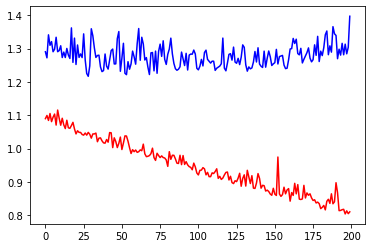

In [9]:
plt.plot(history.history["loss"],color="red")
plt.plot(history.history["val_loss"],color="blue")